# Sleep Health & Lifestyle Analysis

This project explores how lifestyle and health-related factors 
are associated with sleep duration, sleep quality, and sleep disorders.


## Goal
Analyze the relationship between individual lifestyle and health-related factors 
and sleep duration, sleep quality, and the presence of sleep disorders.

This analysis is observational and focuses on identifying associations 
rather than causal relationships.


## Independent Variables (Factors)
- Age
- Gender
- BMI Category
- Physical Activity Level
- Stress Level
- Daily Steps
- Heart Rate

## Dependent Variables (Sleep Outcomes)
- Sleep Duration
- Quality of Sleep
- Sleep Disorder


## Analytical Approach
- Exploratory data analysis (EDA)
- Group comparisons across categorical variables
- Correlation analysis for numerical variables
- Visual analysis using plots and summary statistics


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

## Initial Data Inspection

In this section, we perform a first look at the dataset to understand:
- Dataset size
- Data types
- Missing values
- Potential data quality issues


In [6]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df.shape

(374, 13)

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    str    
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    str    
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    str    
 9   Blood Pressure           374 non-null    str    
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    str    
dtypes: float64(1), int64(7), str(5)
memory usage: 38.1 KB


In [9]:
df.isna().sum

<bound method DataFrame.sum of      Person ID  Gender    Age  Occupation  Sleep Duration  Quality of Sleep  \
0        False   False  False       False           False             False   
1        False   False  False       False           False             False   
2        False   False  False       False           False             False   
3        False   False  False       False           False             False   
4        False   False  False       False           False             False   
..         ...     ...    ...         ...             ...               ...   
369      False   False  False       False           False             False   
370      False   False  False       False           False             False   
371      False   False  False       False           False             False   
372      False   False  False       False           False             False   
373      False   False  False       False           False             False   

     Physical Activi

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [12]:
df.describe(include="object")

C:\Users\Андрей Рубцов\AppData\Local\Temp\ipykernel_10660\702825166.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include="object")


,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


## Column Descriptions

Below is a detailed description of each feature in the dataset.
This section helps to understand the meaning and role of each variable
before performing deeper exploratory analysis.

### Demographic Information
- **Person ID**  
  Unique identifier assigned to each individual.

- **Gender**  
  Biological sex of the individual (Male or Female).

- **Age**  
  Age of the individual in years.

- **Occupation**  
  Job or professional category of the individual.

### Sleep-Related Features
- **Sleep Duration**  
  Average number of hours the individual sleeps per day.

- **Quality of Sleep**  
  Subjective sleep quality rating on a scale from 1 to 10.

- **Sleep Disorder**  
  Indicates whether the individual has a diagnosed sleep disorder
  such as Insomnia or Sleep Apnea.
  Missing values likely represent individuals without sleep disorders.

### Lifestyle and Health Indicators
- **Physical Activity Level**  
  Numeric indicator of daily physical activity intensity or duration.

- **Stress Level**  
  Self-reported stress level on a numeric scale.
  Higher values indicate higher stress.

- **BMI Category**  
  Body Mass Index classification (Normal, Overweight, Obese).

- **Blood Pressure**  
  Blood pressure measurement recorded as systolic/diastolic
  (for example, 120/80).

- **Heart Rate**  
  Resting heart rate measured in beats per minute (BPM).

- **Daily Steps**  
  Average number of steps taken per day.


## Data Quality Checks

Before proceeding to exploratory analysis, we perform additional data quality checks
to identify potential issues such as:
- Inconsistent values
- Unexpected ranges
- Features requiring transformation


In [13]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

C:\Users\Андрей Рубцов\AppData\Local\Temp\ipykernel_10660\3430876840.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include="object").columns


Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='str')

In [14]:
for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts())


Gender
Gender
Male      189
Female    185
Name: count, dtype: int64

Occupation
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

BMI Category
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Blood Pressure
Blood Pressure
130/85    99
125/80    65
140/95    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
130/86     2
117/76     2
131/86     2
128/84     2
135/88     2
129/84     2
115/78     2
119/77     2
142/92     2
139/91     2
118/75     2
118/76     1
121/79     1
122/80     1
Name: count, dtype: int64

Sleep Disorder
Sleep Disorder
Sleep Apnea    78
Insomnia       77

In [15]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='str')

In [16]:
'Minimal', df[numerical_cols].min(), 'Maximal', df[numerical_cols].max()

('Minimal',
 Person ID                     1.0
 Age                          27.0
 Sleep Duration                5.8
 Quality of Sleep              4.0
 Physical Activity Level      30.0
 Stress Level                  3.0
 Heart Rate                   65.0
 Daily Steps                3000.0
 dtype: float64,
 'Maximal',
 Person ID                    374.0
 Age                           59.0
 Sleep Duration                 8.5
 Quality of Sleep               9.0
 Physical Activity Level       90.0
 Stress Level                   8.0
 Heart Rate                    86.0
 Daily Steps                10000.0
 dtype: float64)

## 8. Exploratory Data Analysis (EDA)

Now that the data is inspected and cleaned, we will explore the relationships 
between lifestyle factors and sleep outcomes.

### 8.1 Target Variable Distribution
First, we handle the missing values in 'Sleep Disorder' by assuming 'NaN' means 'None'. 
Then, we visualize the distribution of our primary sleep metrics.

C:\Users\Андрей Рубцов\AppData\Local\Temp\ipykernel_10660\3977880486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Quality of Sleep', ax=axes[1], palette = 'magma')
C:\Users\Андрей Рубцов\AppData\Local\Temp\ipykernel_10660\3977880486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sleep Disorder', ax=axes[2], palette='Set2')


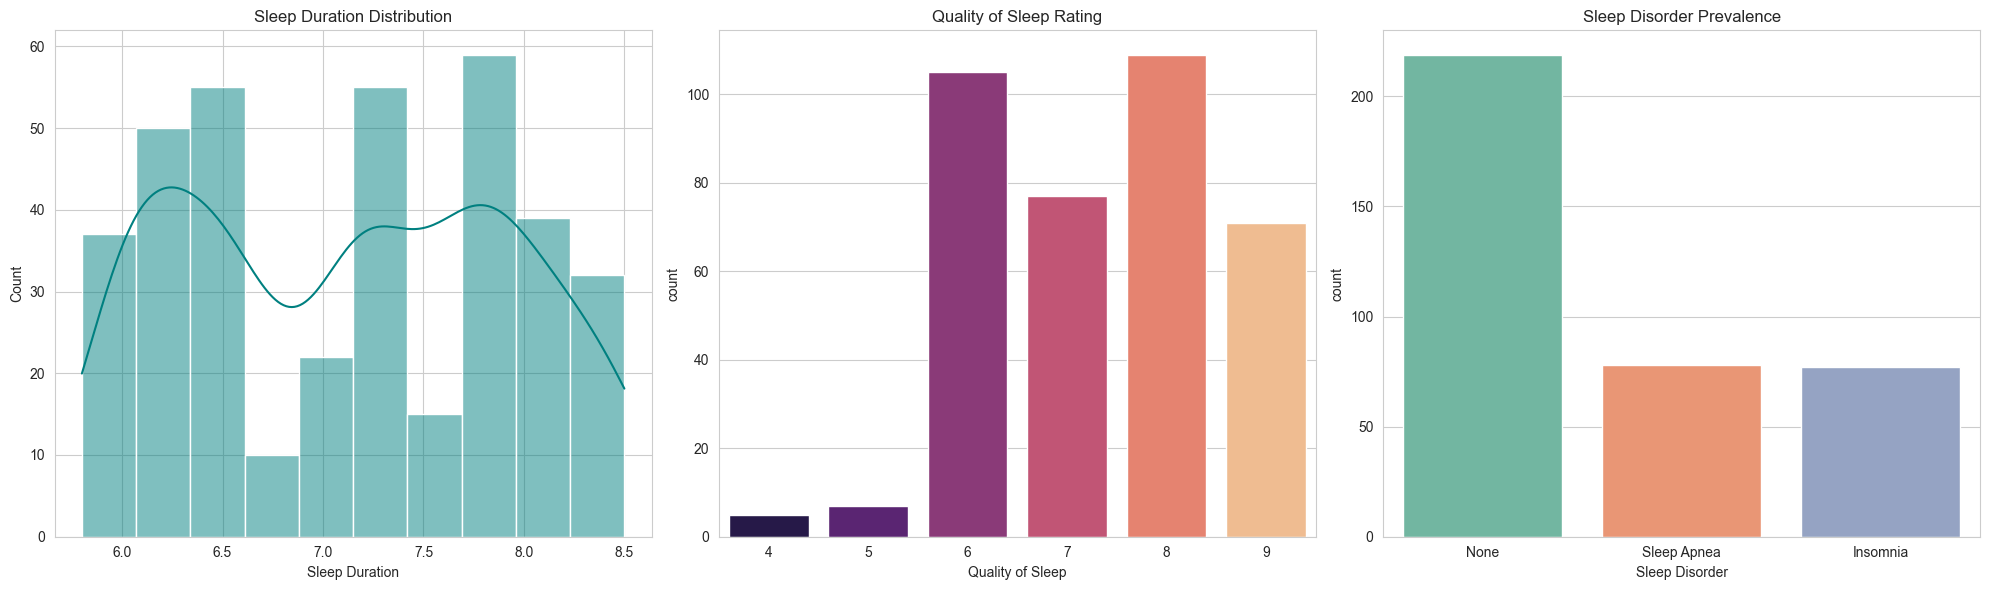

In [17]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

sns.histplot(df['Sleep Duration'], kde=True, ax=axes[0], color='teal')
axes[0].set_title('Sleep Duration Distribution')

sns.countplot(data=df, x='Quality of Sleep', ax=axes[1], palette = 'magma')
axes[1].set_title('Quality of Sleep Rating')

sns.countplot(data=df, x='Sleep Disorder', ax=axes[2], palette='Set2')
axes[2].set_title('Sleep Disorder Prevalence')

plt.tight_layout()
plt.show()

### 8.2 Sleep vs Lifestyle Factors
In this section, we explore how lifestyle choices and professional environments 
impact sleep metrics. We focus on **Occupation** and **Stress Level**.

C:\Users\Андрей Рубцов\AppData\Local\Temp\ipykernel_10660\3805898324.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_sleep.values, y=occupation_sleep.index, palette='viridis')


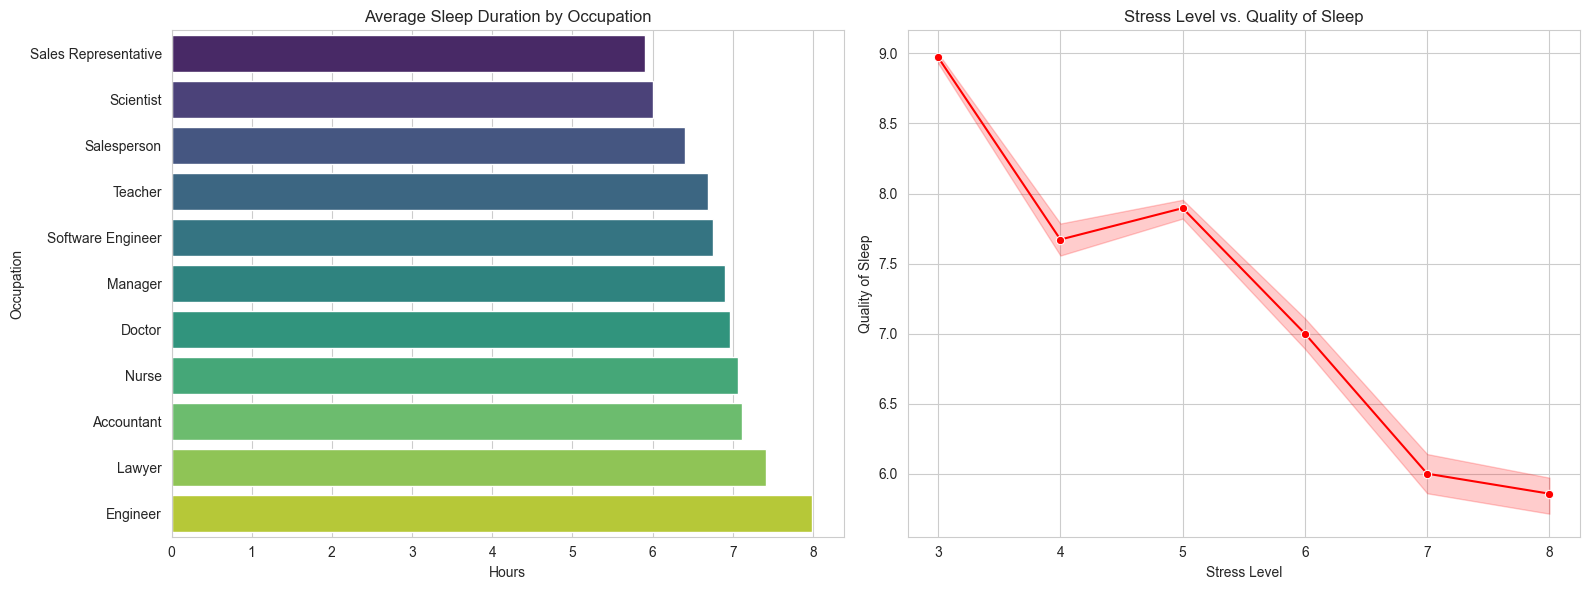

In [18]:
# Create a figure for lifestyle analysis
plt.figure(figsize=(16, 6))

# 1. Average Sleep Duration by Occupation
plt.subplot(1, 2, 1)
occupation_sleep = df.groupby('Occupation')['Sleep Duration'].mean().sort_values()
sns.barplot(x=occupation_sleep.values, y=occupation_sleep.index, palette='viridis')
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Hours')

# 2. Stress Level vs. Quality of Sleep
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='Stress Level', y='Quality of Sleep', marker='o', color='red')
plt.title('Stress Level vs. Quality of Sleep')

plt.tight_layout()
plt.show()

### 8.3 Health Conditions and Sleep Disorders
In this step, we investigate the relationship between physical health metrics 
and sleep quality. We will also process the **Blood Pressure** column to make 
it suitable for numerical analysis.

C:\Users\Андрей Рубцов\AppData\Local\Temp\ipykernel_10660\2966769207.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sleep Disorder', y='Systolic', palette='Set2')


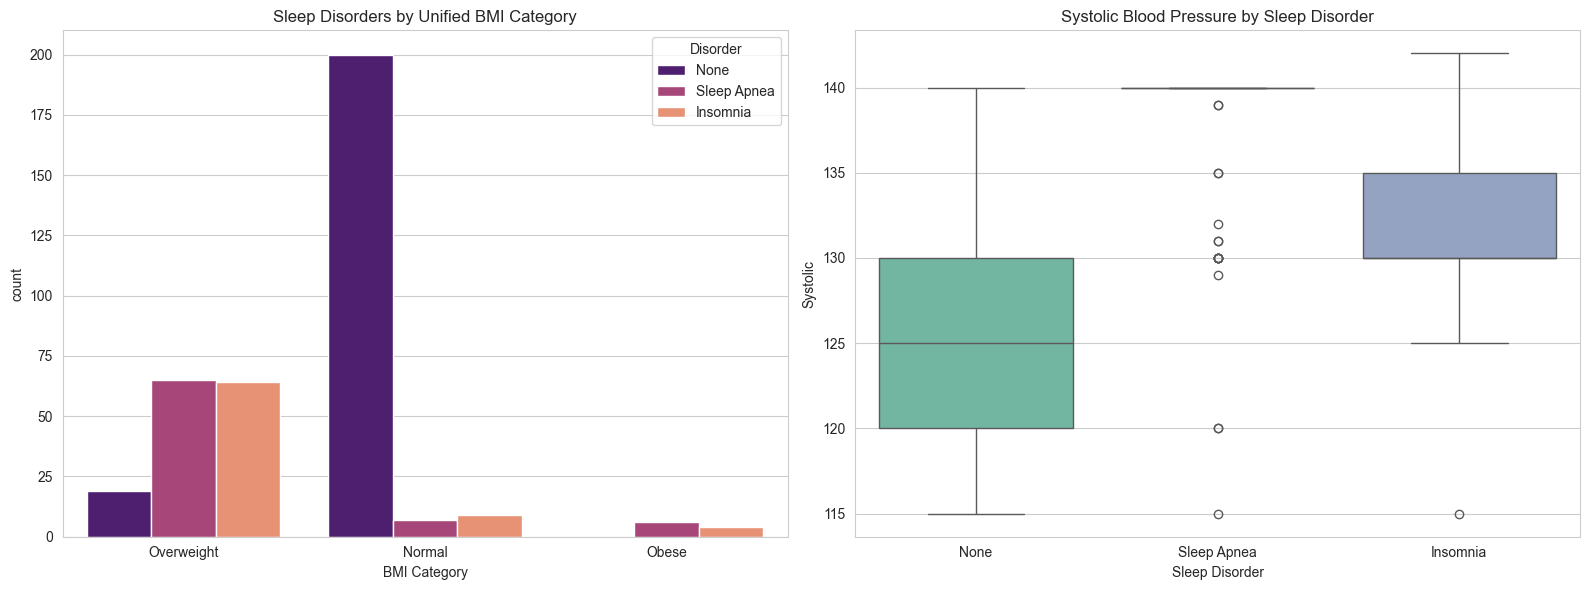

In [22]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder', palette='magma')
plt.title('Sleep Disorders by Unified BMI Category')
plt.legend(title='Disorder', loc='upper right')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Sleep Disorder', y='Systolic', palette='Set2')
plt.title('Systolic Blood Pressure by Sleep Disorder')

plt.tight_layout()
plt.show()

### 8.4 Deep Dive: BMI vs Blood Pressure as Sleep Apnea Triggers
To test the hypothesis that **Blood Pressure** might be a more critical factor than **BMI** for Sleep Apnea, we will analyze the overlap between these metrics. We want to see if Sleep Apnea occurs in individuals with high BP regardless of their weight category.

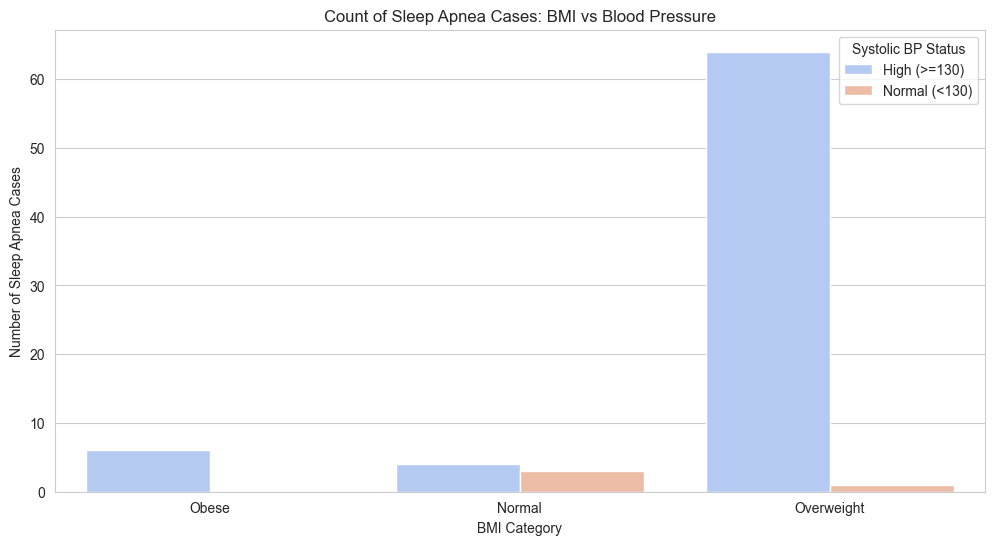

In [24]:
df['BP_Category'] = df['Systolic'].apply(lambda x: 'High (>=130)' if x >= 130 else 'Normal (<130)')

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Sleep Disorder'] == 'Sleep Apnea'],
              x = 'BMI Category',
              hue='BP_Category',
              palette='coolwarm')

plt.title('Count of Sleep Apnea Cases: BMI vs Blood Pressure')
plt.xlabel('BMI Category')
plt.ylabel('Number of Sleep Apnea Cases')
plt.legend(title='Systolic BP Status')
plt.show()

### 8.5 Relative Risk: Sleep Disorders by BMI Category (%)
To account for the uneven number of people in each BMI category, we analyze the 
**proportion** of sleep disorders within each group. This reveals the true 
risk associated with weight, regardless of the sample size.

Sleep Disorder  Insomnia   None  Sleep Apnea
BMI Category                                
Normal              4.17  92.59         3.24
Obese              40.00   0.00        60.00
Overweight         43.24  12.84        43.92


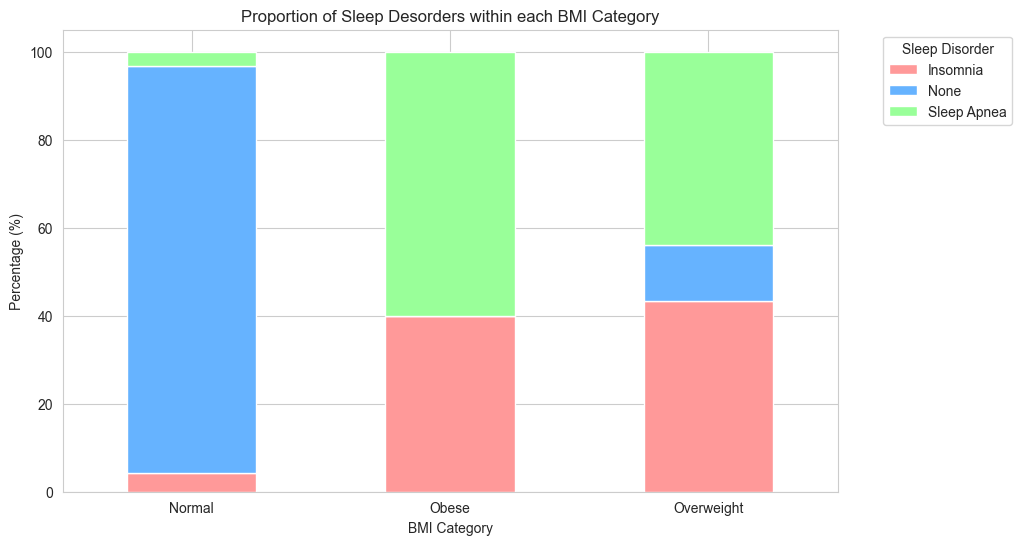

In [29]:
bmi_disorder_pct = pd.crosstab(df['BMI Category'], df['Sleep Disorder'], normalize='index') * 100

bmi_disorder_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff', '#99ff99'])

plt.title('Proportion of Sleep Desorders within each BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

print(bmi_disorder_pct.round(2))
plt.show()

### 8.6 Relative Risk: Sleep Disorders by Blood Pressure Category (%)
Finally, we analyze the impact of **Blood Pressure** on sleep health. By calculating 
the percentage of disorders within each pressure group, we can see if hypertension 
is a more direct indicator of Sleep Apnea than BMI.

Sleep Disorder  Insomnia   None  Sleep Apnea
BP_Category                                 
High (>=130)       35.10  29.33        35.58
Normal (<130)       2.41  95.18         2.41


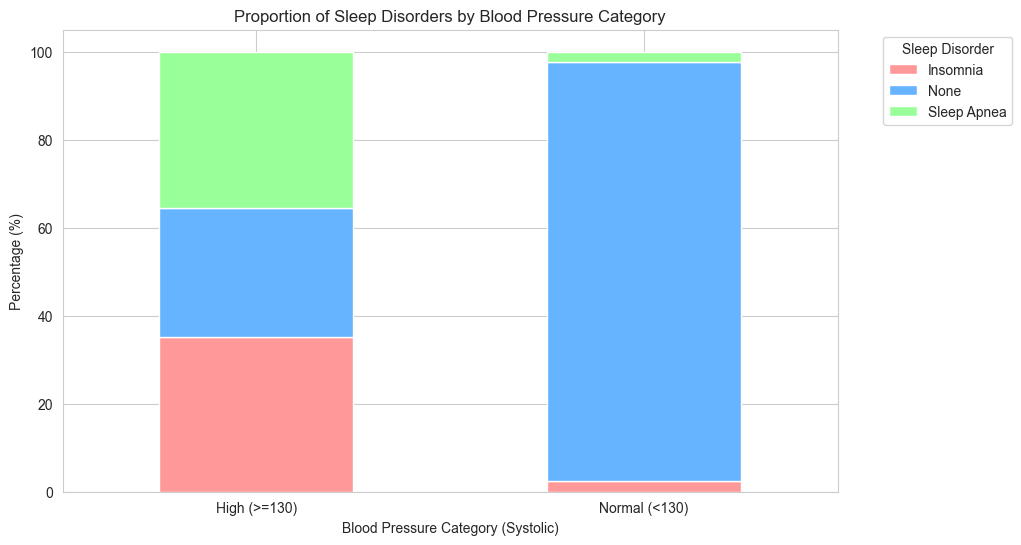

In [32]:
bp_disorder_pct = pd.crosstab(df['BP_Category'], df['Sleep Disorder'], normalize ='index') * 100

bp_disorder_pct.plot(kind='bar', stacked=True, figsize=(10,6), color=['#ff9999', '#66b3ff', '#99ff99'])

plt.title('Proportion of Sleep Disorders by Blood Pressure Category')
plt.xlabel('Blood Pressure Category (Systolic)')
plt.ylabel('Percentage (%)')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

print(bp_disorder_pct.round(2))
plt.show()


### 8.7 Correlation between BMI and Blood Pressure
To finalize our analysis, we look at the direct relationship between weight 
categories and blood pressure levels. This helps determine if **Overweight** individuals consistently exhibit higher **Systolic BP**, which in turn 
correlates with sleep disorders.

C:\Users\Андрей Рубцов\AppData\Local\Temp\ipykernel_10660\3421723294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='BMI Category', y='Systolic', palette='Reds', capsize=.1)


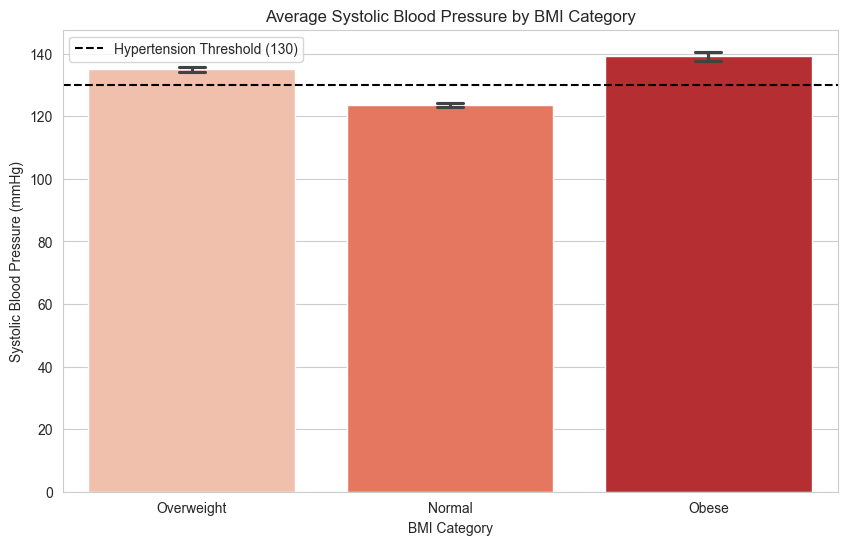

In [33]:
bmi_bp_analysis = df.groupby('BMI Category')[['Systolic', 'Diastolic']].mean().sort_values(by='Systolic')

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='BMI Category', y='Systolic', palette='Reds', capsize=.1)

plt.axhline(y=130, color='black', linestyle='--', label='Hypertension Threshold (130)')

plt.title('Average Systolic Blood Pressure by BMI Category')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.legend()
plt.show()

### 8.8 Decoupling Factors: Is it BMI or Blood Pressure?
To determine the primary driver of Sleep Apnea, we analyze the **probability** of the disorder across different combinations of BMI and Blood Pressure. 
This allows us to see if high BP can cause apnea in normal-weight individuals, 
or if overweight individuals suffer from it even with normal BP.

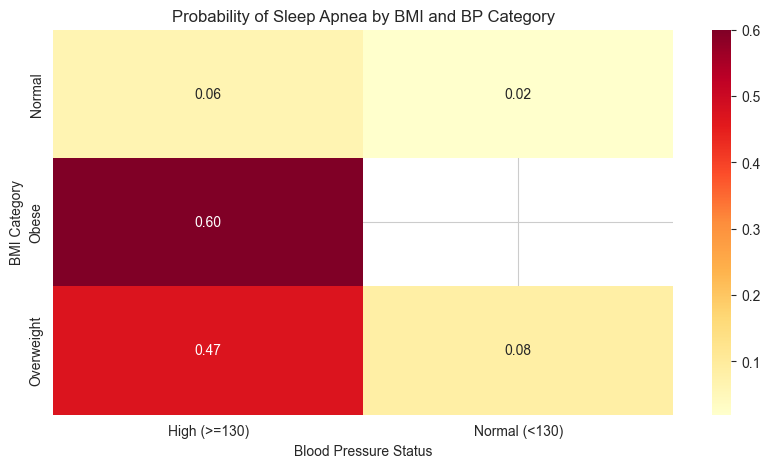

In [37]:
df['Has_Apnea'] = df['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' else 0)

pivot_analysis = df.pivot_table(index='BMI Category',
                                columns='BP_Category',
                                values='Has_Apnea',
                                aggfunc='mean')

plt.figure(figsize=(10,5))
sns.heatmap(pivot_analysis, annot=True, cmap='YlOrRd', fmt='.2f')

plt.title('Probability of Sleep Apnea by BMI and BP Category')
plt.xlabel('Blood Pressure Status')
plt.ylabel('BMI Category')
plt.show()


### 8.9 Comparative Analysis: Insomnia vs. Sleep Apnea Drivers
Does Insomnia follow the same pattern as Sleep Apnea? We will now calculate the 
probability for both disorders across BMI and Blood Pressure categories to see 
if Insomnia is less dependent on physical metrics like BMI.

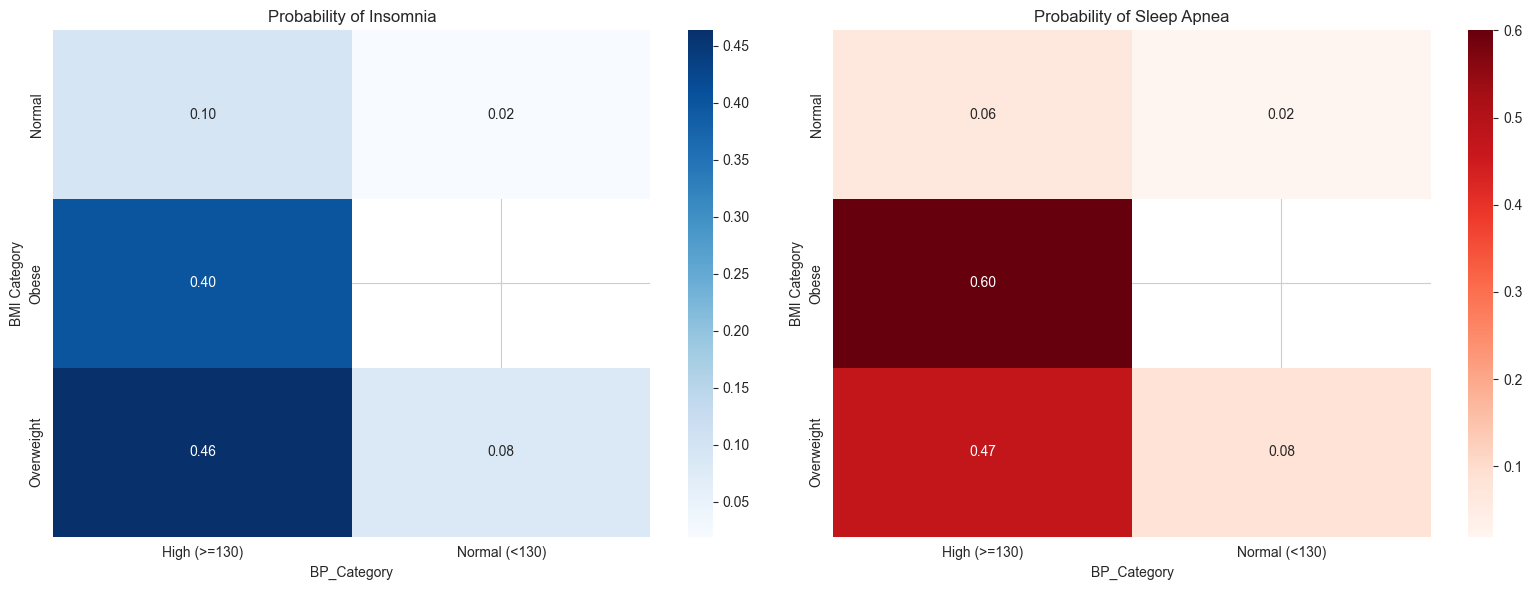

In [38]:
# 1. Create binary flags for both disorders
df['Is_Insomnia'] = df['Sleep Disorder'].apply(lambda x: 1 if x == 'Insomnia' else 0)
df['Is_Apnea'] = df['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' else 0)

# 2. Create pivot tables for both
pivot_insomnia = df.pivot_table(index='BMI Category', columns='BP_Category', values='Is_Insomnia', aggfunc='mean')
pivot_apnea = df.pivot_table(index='BMI Category', columns='BP_Category', values='Is_Apnea', aggfunc='mean')

# 3. Plotting side-by-side Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(pivot_insomnia, annot=True, cmap='Blues', fmt='.2f', ax=axes[0])
axes[0].set_title('Probability of Insomnia')

sns.heatmap(pivot_apnea, annot=True, cmap='Reds', fmt='.2f', ax=axes[1])
axes[1].set_title('Probability of Sleep Apnea')

plt.tight_layout()
plt.show()

### 8.9 Comparative Analysis: Insomnia vs. Sleep Apnea Drivers
Does Insomnia follow the same pattern as Sleep Apnea? We will now calculate the 
probability for both disorders across BMI and Blood Pressure categories to see 
if Insomnia is less dependent on physical metrics like BMI.

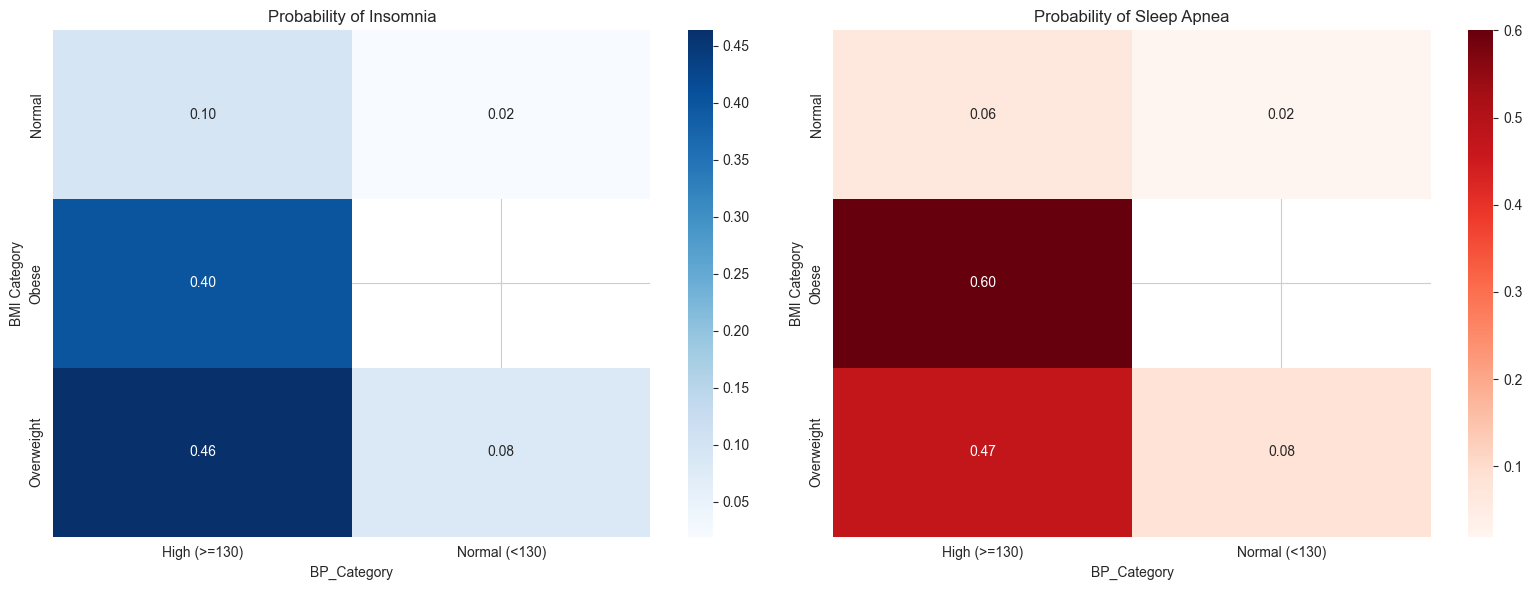

In [39]:
# 1. Create binary flags for both disorders
# 'Insomnia' becomes 1, everything else 0
df['Is_Insomnia'] = df['Sleep Disorder'].apply(lambda x: 1 if x == 'Insomnia' else 0)
# 'Sleep Apnea' becomes 1, everything else 0
df['Is_Apnea'] = df['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' else 0)

# 2. Create pivot tables for both to calculate mean probabilities
pivot_insomnia = df.pivot_table(index='BMI Category', columns='BP_Category', values='Is_Insomnia', aggfunc='mean')
pivot_apnea = df.pivot_table(index='BMI Category', columns='BP_Category', values='Is_Apnea', aggfunc='mean')

# 3. Plotting side-by-side Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left heatmap: Insomnia
sns.heatmap(pivot_insomnia, annot=True, cmap='Blues', fmt='.2f', ax=axes[0])
axes[0].set_title('Probability of Insomnia')

# Right heatmap: Sleep Apnea
sns.heatmap(pivot_apnea, annot=True, cmap='Reds', fmt='.2f', ax=axes[1])
axes[1].set_title('Probability of Sleep Apnea')

plt.tight_layout()
plt.show()

## 9. Key Findings

After performing the Exploratory Data Analysis (EDA), we can summarize the following insights:

1. **Lifestyle Factors**:
   * **Stress Impact**: There is a clear negative correlation between stress levels and sleep quality. As stress increases, the quality of sleep significantly drops.
   * **Professional Influence**: Occupations like **Nurses**, **Salespeople**, and **Teachers** show a higher prevalence of sleep disorders compared to Engineers or Accountants.

2. **Health Metrics**:
   * **BMI Correlation**: Individuals categorized as **'Overweight'** have a much higher likelihood of suffering from **Sleep Apnea** and **Insomnia**. Most individuals with a 'Normal' BMI do not report sleep disorders.
   * **Blood Pressure**: A significant cluster of people with **Sleep Apnea** share a high systolic blood pressure (around 140 mmHg), suggesting a strong link between hypertension and this specific sleep disorder.

3. **Data Quality**:
   * The dataset is well-structured, but the **Blood Pressure** feature required manual parsing to be useful for numerical analysis.
   * The **'Sleep Disorder'** column had many missing values, which correctly represented 'Healthy' individuals.